In [1]:
import pandas as pd
import numpy as np
import scipy as sc


import warnings 
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Liabilities = ['DataDate', 'GVKey','Iid','Sector',
                  'STD', 'LTD', 'other_liabilities',
                  'acc_payable','int_exp', 'liabilities_total']

Equity = ['DataDate', 'GVKey','Iid','Sector',
             'equity', 'Retained Earnings', 'stockholders_equity',
             'tangible_equity','book_value_per_share', 
             'Invested_capital', 'preference_stock' ]

Assets = ['DataDate', 'GVKey','Iid','Sector',
             'cur_assets', 'total_assets','cash', 
             'intangible_assets', 'inventories', 'acc_receivables']

PL = ['DataDate', 'GVKey','Iid','Sector',
         'sales', 'COGS', 'amort','Other_exp', 'ebit', 
         'interests_paid_net','tax', 'deferred_taxes', 
         'deferred_taxes_fed','deferred_taxes_foreign', 'income_taxes' ]

CF = ['DataDate', 'GVKey','Iid','Sector',
         'capex', 'dividends', 'op_act_net_CF', 
         'op_inc_after_dep', 'op_in_before_dep']

other = ['DataDate', 'GVKey','Iid','Sector',
            'employees', 'minority_interests', 
            'noncontrolling_interests', 'marketable_sec', 
            'working_cap', 'mii', 'Implied Option Expense']

Coef_tab = ['DataDate', 'GVKey','Iid','Sector',
               'EarningsYld', 'EpsGrowth1Yr', 'GrossMargin', 
               'OperatingMargin','PriceBook', 'ROA', 'ROE', 
               'SalesGrowth1Yr', 'SalesGrowth5Yr', 'SalesYld' ]

In [8]:
dd = pd.read_excel('New_Market_Data.xlsx')

In [2]:
df = pd.read_excel('New_Fundamental_Data.xlsx')

443

## Проекция ликвидности 

### Краткосрочная ликвидность

$ Current Ratio = \frac{C.A.}{C.L.} $

$ Quick Ratio = \frac{C.A. - Inventories}{C.L.} $

$ Cash Ratio = \frac{Cash}{C.L.} $

### Долгосрочная ликвидность

$ICR = \frac{EBIT}{Interest expenses}$

$STDcoef = \frac{STD}{TD}$



In [3]:
features = pd.DataFrame()

# ликвидность
features['current_ratio'] = df['cur_assets']/(df['STD'] + df['int_exp'] + df['acc_payable'])
features['current_ratio'] = features['current_ratio'].where(features['current_ratio'] < 150, 150)

features['icr'] = df['ebit']/df['int_exp']
features['icr'] = features['icr'].where(features['icr'] != inf, 100)
features['icr'] = features['icr'].where(features['icr'] != -inf, 0)
features['icr'] = features['icr'].where(features['icr'] < 1500, 1500)

features['std_coef'] = df['STD']/ (df['LTD'] + df['STD'])

# эффективность
features['ROA'] = df['ROA']

features['ROE'] = df['ROE']

features['sales_growth'] = df['SalesGrowth1Yr']

features['sales_yld'] = df['SalesYld']

features['ebit/sales'] = df['ebit'] / df['sales']

features['gross_margin'] = df['GrossMargin']


In [ ]:
features['ISG'] = 0
features['BV/MV'] = 0
features['TSR'] = 0
features['ROC/WACC'] = 0

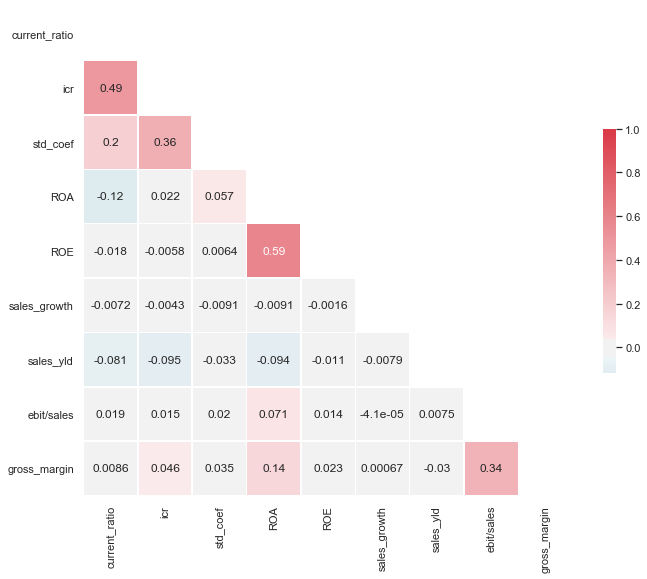

In [7]:
%config InlineBackend.figure_format = 'png' 
sns.set(style="white", palette = 'coolwarm')

# Compute the correlation matrix
corr = features.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center = 0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

## Проекция эффективности

### Balance

GrossMargin 

OperatingMargin

ROA

ROE

SalesGrowth1Yr

SalesGrowth5Yr

SalesYld'

### Market

TSR = 

ROC - WACC = 

EVA = 

CVA = 

MCVA = 